# Assignment 2: N-grams and Language Identification
## CNG463 - Introduction to Natural Language Processing
### METU NCC Computer Engineering | Fall 2025-26

**Student Name:** Emmanuel Monye  
**Student ID:** 2406254

**Due Date:** 16 November 2025 (Sunday) before midnight

---

## Overview

This assignment focuses on:
1. Building **character-based** 2-gram and 3-gram language models with Laplace smoothing
2. Sentence-based language identification using 10-fold cross-validation
3. Evaluation using accuracy, precision, recall, and F1-score
4. Comparison and analysis

**Note:** For language identification, we use **character n-grams** rather than word n-grams because they better capture language-specific patterns like letter combinations, diacritics, and writing systems.

**Grading:**
- Written Questions (7 × 4 pts): **28 pts**
- Code Tasks with TODO (11 total): **72 pts** distributed by effort level:
  - Simple tasks: 4 pts each (2 cells)
  - Moderate tasks: 6 pts each (4 cells)
  - Complex tasks: 8 pts each (5 cells)
- **Total: 100 pts**

---

## Pre-Submission Checklist

- [ ] Name and student ID at top
- [ ] No cells are added or removed
- [ ] All TODO sections completed
- [ ] All questions answered
- [ ] Code runs without errors
- [ ] Results tables included
- [ ] Run All before saving

## Setup and Imports

In [66]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from typing import List, Tuple, Dict
import re

# Scikit-learn for cross-validation and metrics
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from scipy.stats import ttest_rel


# Set random seed for reproducibility
np.random.seed(42)

---

# Task 1: Corpus Preparation and Statistics (22 points)

## 1.1: Upload Corpus Files

Prepare your text files in **two different languages** (accepted formats: `.txt`, `.pdf`, or `.docx`). When you run the cell below, you'll be prompted to upload files for each language separately. Make sure your files contain substantial text (reports, essays, or similar content from other courses). Each language requires at least **5000** words in its corpus.

In [67]:
from google.colab import files

print("Upload your ENGLISH corpus file(s):")
english_files = files.upload()

print("\nUpload your SECOND LANGUAGE corpus file(s):")
second_lang_files = files.upload()


Upload your ENGLISH corpus file(s):


Saving english.txt to english (3).txt
Saving english2.txt to english2 (2).txt

Upload your SECOND LANGUAGE corpus file(s):


Saving french.txt to french (2).txt


## 1.2: Load and Preprocess Data (12 points)

Load your uploaded files, extract text, preprocess, split into sentences, and tokenize. You'll need helper functions to handle different file formats.

**Steps:**
1. Read files based on format (`.txt`, `.pdf`, `.docx`) and combine them into single text for each language
2. Apply preprocessing (e.g., lowercasing, handling punctuation)
3. Split each corpus into individual sentences
4. Tokenize each sentence into words (for statistics)
5. Store the results as two lists of tokenized sentences

**Important:** You'll use word tokenization for calculating statistics, but for the n-gram models in Task 2, you'll work with character n-grams directly on the sentence strings.

In [68]:
import re
from typing import List
import PyPDF2
import docx

def read_txt_file(filename: str) -> str:
    """Read a .txt file and return its content."""
    with open(filename, 'r', encoding='utf-8') as f:
        return f.read()

def read_pdf_file(filename: str) -> str:
    """Read a .pdf file and return its text content."""
    with open(filename, 'rb') as f:
        pdf_reader = PyPDF2.PdfReader(f)
        text = ''
        for page in pdf_reader.pages:
            text += page.extract_text()
        return text
    # TODO: Install and use PyPDF2 or pdfplumber
    # Example: pip install PyPDF2
    pass

def read_docx_file(filename: str) -> str:
    """Read a .docx file and return its text content."""
    doc = docx.Document(filename)
    text = ''
    for paragraph in doc.paragraphs:
        text += paragraph.text + '\n'
    return text
    # TODO: Install and use python-docx
    # Example: pip install python-docx
    pass

def split_into_sentences(text: str) -> List[str]:
    """Split text into sentences."""
    # Split on .!? followed by whitespace or end of string
    sentences = re.split(r'(?<=[.!?])\s+', text)
    # Remove empty sentences and strip whitespace
    sentences = [s.strip() for s in sentences if s.strip()]
    return sentences

    # TODO: Implement sentence splitting
    # You can use simple regex or nltk.sent_tokenize
    pass

def tokenize_sentence(sentence: str) -> List[str]:
    """Tokenize a sentence into words."""
    words = re.findall(r'\b\w+\b', sentence.lower())
    return words

    # TODO: Implement word tokenization
    # You can use str.split() or nltk.word_tokenize
    pass

def process_files(file_dict, language_name):
    """Process uploaded files for a language."""
    all_text = ""
    for filename in file_dict.keys():
        try:
            if filename.lower().endswith('.txt'):
                text = read_txt_file(filename)
            elif filename.lower().endswith('.pdf'):
                text = read_pdf_file(filename)
            elif filename.lower().endswith('.docx'):
                text = read_docx_file(filename)
            else:
                print(f"Unsupported file format: {filename}")
                continue

            all_text += text + " "
            print(f"Processed {filename} successfully")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

    # Preprocess: lowercase and remove extra whitespace
    all_text = all_text.lower()
    all_text = re.sub(r'\s+', ' ', all_text).strip()

    # Split into sentences
    sentences = split_into_sentences(all_text)

    # Tokenize sentences
    tokenized_sentences = [tokenize_sentence(sent) for sent in sentences]

    print(f"{language_name}: {len(sentences)} sentences, {sum(len(s) for s in tokenized_sentences)} words")
    return sentences, tokenized_sentences

# Process both languages
print("Processing English files...")
lang1_sentences, lang1_sentences_tokenized = process_files(english_files, "English")

print("\nProcessing Second Language files...")
lang2_sentences, lang2_sentences_tokenized = process_files(second_lang_files, "Second Language")

print(f"\nFinal Counts:")
print(f"English: {len(lang1_sentences)} sentences")
print(f"Second Language: {len(lang2_sentences)} sentences")

# TODO:
#
# 1. Read and combine files for each language
#    - Loop through lang1_files and lang2_files
#    - Use appropriate read function based on file extension
#    - Combine all text into lang1_text and lang2_text
#
# 2. Apply preprocessing to both lang1_text and lang2_text
#    (e.g., lowercasing, removing extra whitespace)
#
# 3. Split each corpus into sentences using split_into_sentences()
#
# 4. Tokenize each sentence using tokenize_sentence()
#
# Note: These tokenized sentences will be used for statistics in Task 1.
# In Task 2, you'll work with the raw sentence strings for character n-grams.

# At the end, you should have:
# lang1_sentences = [sent1, sent2, ...]
# lang2_sentences = [sent1, sent2, ...]
# lang1_sentences_tokenized = [[word1, word2, ...], [word1, word2, ...], ...]
# lang2_sentences_tokenized = [[word1, word2, ...], [word1, word2, ...], ...]


# [8 pts]

Processing English files...
Processed english (3).txt successfully
Processed english2 (2).txt successfully
English: 687 sentences, 17404 words

Processing Second Language files...
Processed french (2).txt successfully
Second Language: 212 sentences, 4280 words

Final Counts:
English: 687 sentences
Second Language: 212 sentences


**Question 1.1:** What preprocessing choices did you make and why? (3-5 sentences)

I chose to lowercase all text to ensure case-insensitive processing, which is common in language identification tasks. For sentence splitting, I used regex-based splitting on punctuation marks followed by whitespace, which works reasonably well for most European languages (English as my first language and French as my second). For tokenization, I used word boundary regex to extract words while removing punctuation. These choices help normalize the text and focus on linguistic patterns rather than formatting variations.



## 1.3: Basic Statistics (10 points)

Calculate and display key statistics for both language corpora to understand their characteristics.

In [69]:
def calculate_corpus_statistics(sentences, tokenized_sentences, language_name):
    """Calculate and display statistics for a corpus."""
    # Character statistics
    total_chars = sum(len(sentence) for sentence in sentences)
    special_chars = sum(len(re.findall(r'[^\w\s]', sentence)) for sentence in sentences)
    char_vocab = len(set(''.join(sentences)))

    # Word statistics
    all_words = [word for sentence in tokenized_sentences for word in sentence]
    total_words = len(all_words)
    word_vocab = len(set(all_words))

    # Sentence statistics
    sentence_count = len(sentences)
    avg_sentence_length = total_words / sentence_count if sentence_count > 0 else 0

    print(f"\n{language_name} Statistics:")
    print(f"  Total characters: {total_chars}")
    print(f"  Special characters: {special_chars}")
    print(f"  Character vocabulary: {char_vocab}")
    print(f"  Total words: {total_words}")
    print(f"  Word vocabulary: {word_vocab}")
    print(f"  Sentence count: {sentence_count}")
    print(f"  Average sentence length: {avg_sentence_length:.2f} words")

    return {
        'total_chars': total_chars,
        'special_chars': special_chars,
        'char_vocab': char_vocab,
        'total_words': total_words,
        'word_vocab': word_vocab,
        'sentence_count': sentence_count,
        'avg_sentence_length': avg_sentence_length
    }

# Calculate statistics for both languages
stats_lang1 = calculate_corpus_statistics(lang1_sentences, lang1_sentences_tokenized, "English")
stats_lang2 = calculate_corpus_statistics(lang2_sentences, lang2_sentences_tokenized, "Second Language")

# TODO: Calculate statistics for BOTH languages
#
# For each language (lang1_sentences and lang2_sentences):
# - Total character count
# - Special character/punctuation count
# - Character vocabulary size (unique characters)
# - Total word count
# - Word vocabulary size (unique words)
# - Sentence count
# - Average sentence length (in words)
#
# Example structure:
# lang1_total_characters = sum(len(sentence) for sentence in lang1_sentences)
# ...
# lang1_total_words = sum(len(sentence) for sentence in lang1_sentences_tokenized)
# lang1_word_vocabulary = len(set(word for sentence in lang1_sentences_tokenized for word in sentence))
# ...
#
# Print statistics side by side for the two corpora


# [6 pts]


English Statistics:
  Total characters: 97078
  Special characters: 2227
  Character vocabulary: 57
  Total words: 17404
  Word vocabulary: 3538
  Sentence count: 687
  Average sentence length: 25.33 words

Second Language Statistics:
  Total characters: 26549
  Special characters: 931
  Character vocabulary: 65
  Total words: 4280
  Word vocabulary: 1495
  Sentence count: 212
  Average sentence length: 20.19 words


**Question 1.2:** What are the key differences between your two corpora? (2-3 sentences)

The key differences between my corpora include vocabulary size, average sentence length, and character distribution. English typically has shorter average word length compared to many other languages. French has different character sets or special characters that affect the character vocabulary size.

---

# Task 2: Character N-gram Language Identification (58 points)

**Baseline (46 pts):** Implement character-based 2-gram and 3-gram models, run 10-fold CV, report accuracy.  
**Creativity (12 pts):** Out-of-vocabulary analysis.

## 2.1: Implement Character N-gram Models (12 points)

Implement the `CharNgramLanguageModel` class with Laplace smoothing using NLTK's n-gram utilities. The model should count **character** n-grams during training and calculate sentence probabilities with smoothing.

**Key difference from word n-grams:** Instead of tokenizing sentences into words, you'll work with individual characters in each sentence.

In [70]:
import nltk
from nltk.util import ngrams, pad_sequence
from nltk.lm import Laplace
from nltk.lm.preprocessing import padded_everygram_pipeline
from typing import List

# Download required NLTK data
nltk.download('punkt', quiet=True)

class CharNgramLanguageModel:
    """
    Character-based N-gram language model with Laplace (add-1) smoothing using NLTK.
    """

    def __init__(self, n: int = 2):
        """
        Initialize the character n-gram model.

        Args:
            n: Order of n-gram (2 for bigram, 3 for trigram)
        """
        self.n = n
        self.model = Laplace(n)

    def train(self, sentences: List[str]):
        """
        Train the model on a list of sentences.

        Args:
            sentences: List of sentences (each sentence is a string)
        """
        # TODO: Your code here
        # Convert each sentence to a list of characters
        # Example: "hello" -> ['h', 'e', 'l', 'l', 'o']
        # Use padded_everygram_pipeline to prepare training data with padding
        # Then fit the model using self.model.fit()

        char_sequences = []
        for sentence in sentences:
            chars = list(sentence)
            char_sequences.append(chars)

        train_data, padded_vocab = padded_everygram_pipeline(self.n, char_sequences)

        # Fit the model
        self.model.fit(train_data, padded_vocab)
        pass

    def get_probability(self, sentence: str) -> float:
        """
        Calculate the probability of a sentence.

        Args:
            sentence: Sentence string

        Returns:
            Probability of the sentence
        """
        # TODO: Your code here
        # Convert sentence to list of characters
        # Pad the character sequence and generate n-grams
        # For each n-gram, get probability using self.model.score()
        # Multiply probabilities together (or sum log probabilities to avoid underflow)

        chars = list(sentence)

        # Generate n-grams with padding
        ngrams_list = list(ngrams(pad_sequence(chars, pad_left=True, pad_right=True,
                                              left_pad_symbol='<s>', right_pad_symbol='</s>',
                                              n=self.n), self.n))

        # Calculate log probability to avoid underflow
        log_prob = 0.0
        for ngram in ngrams_list:
            prob = self.model.score(ngram[-1], ngram[:-1])
            log_prob += np.log(prob) if prob > 0 else -np.inf

        return np.exp(log_prob) if log_prob > -np.inf else 0.0
        pass

# [8 pts]

### Spot Check: Inspect Your N-gram Models

After implementing the model, train sample models on both languages and inspect what they learned.

In [71]:
# TODO: Train sample models and inspect them
#
# 1. Create 2-gram and 3-gram models for both languages
# 2. Train them on your full datasets (lang1_sentences and lang2_sentences)
# 3. Inspect the models to see what n-grams they learned
#
# Example:
# model_2gram_lang1 = NgramLanguageModel(n=2)
# model_2gram_lang1.train(lang1_sentences)
# model_3gram_lang1 = NgramLanguageModel(n=3)
# model_3gram_lang1.train(lang1_sentences)
#
# model_2gram_lang2 = NgramLanguageModel(n=2)
# model_2gram_lang2.train(lang2_sentences)
# model_3gram_lang2 = NgramLanguageModel(n=3)
# model_3gram_lang2.train(lang3_sentences)
#
# Display sample n-grams and their counts from each model
# Check vocabulary size: len(model.model.vocab)
# Show most common n-grams or test probabilities on sample sentences

# Your code here

model_2gram_lang1 = CharNgramLanguageModel(n=2)
model_2gram_lang1.train(lang1_sentences)
model_3gram_lang1 = CharNgramLanguageModel(n=3)
model_3gram_lang1.train(lang1_sentences)

model_2gram_lang2 = CharNgramLanguageModel(n=2)
model_2gram_lang2.train(lang2_sentences)
model_3gram_lang2 = CharNgramLanguageModel(n=3)
model_3gram_lang2.train(lang2_sentences)

# Inspect models
print(f"English 2-gram vocabulary size: {len(model_2gram_lang1.model.vocab)}")
print(f"English 3-gram vocabulary size: {len(model_3gram_lang1.model.vocab)}")
print(f"French 2-gram vocabulary size: {len(model_2gram_lang2.model.vocab)}")
print(f"French 3-gram vocabulary size: {len(model_3gram_lang2.model.vocab)}")

# Test on sample sentences
test_sentence = "This is a test sentence."
print(f"\nSample sentence: '{test_sentence}'")
print(f"English 2-gram prob: {model_2gram_lang1.get_probability(test_sentence):.2e}")
print(f"French 2-gram prob: {model_2gram_lang2.get_probability(test_sentence):.2e}")

# [4 pts]

English 2-gram vocabulary size: 60
English 3-gram vocabulary size: 60
French 2-gram vocabulary size: 68
French 3-gram vocabulary size: 68

Sample sentence: 'This is a test sentence.'
English 2-gram prob: 6.03e-27
French 2-gram prob: 2.91e-26


## 2.2: Implement Language Identification (8 points)

Create a function that compares sentence probabilities from two language models and returns the predicted label.

In [72]:
def identify_language(sentence: str,
                     model_lang1: CharNgramLanguageModel,
                     model_lang2: CharNgramLanguageModel) -> int:
    """
    Identify the language of a sentence using two character-based language models.

    Args:
        sentence: Sentence string
        model_lang1: Language model for language 1 (label 0)
        model_lang2: Language model for language 2 (label 1)

    Returns:
        Predicted label (0 or 1)
    """
    # TODO: Your code here
    #
    # Steps:
    # 1. Calculate probability of sentence using model_lang1
    #    prob1 = model_lang1.get_probability(sentence)
    #
    # 2. Calculate probability of sentence using model_lang2
    #    prob2 = model_lang2.get_probability(sentence)
    #
    # 3. Compare probabilities and return the label of the model with higher probability
    #    if prob1 > prob2: return 0
    #    else: return 1

    prob1 = model_lang1.get_probability(sentence)
    prob2 = model_lang2.get_probability(sentence)

    if prob1 > prob2:
        return 0
    else:
        return 1

    pass

# [8 pts]


## 2.3: Implement Evaluation Function (6 points)

Create a function that calculates accuracy, precision, recall, and F1-score given predicted and true labels.

In [73]:
def calculate_metrics(y_true: List[int], y_pred: List[int]) -> Dict[str, float]:
    """
    Calculate evaluation metrics.

    Args:
        y_true: True labels
        y_pred: Predicted labels

    Returns:
        Dictionary with accuracy, precision, recall, f1_score
    """
    # TODO: Your code here
    # Use sklearn's accuracy_score and precision_recall_fscore_support

    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    pass

# [6 pts]

## 2.4: 10-Fold Cross-Validation for Language Identification (8 points)

Implement 10-fold cross-validation to evaluate your character-based n-gram models. In each fold, split the data, train separate models for each language and n-gram order, make predictions, and evaluate performance.

In [74]:
from sklearn.model_selection import KFold

# Prepare dataset: combine sentence STRINGS from both languages with labels
X = lang1_sentences + lang2_sentences
y = [0] * len(lang1_sentences) + [1] * len(lang2_sentences)

print(f"Dataset prepared:")
print(f"  Total sentences: {len(X)}")
print(f"  Language 1 (label 0): {sum(1 for label in y if label == 0)} sentences")
print(f"  Language 2 (label 1): {sum(1 for label in y if label == 1)} sentences")
print()

# Initialize 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Store results for each fold
results_2gram = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
results_3gram = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# TODO: Implement 10-fold cross-validation
#
# For each fold, you need to:
#   1. Split data into train and test sets using train_idx and test_idx from kfold.split(X)
#   2. Separate training sentences by language based on labels
#   3. Train FOUR models total:
#      - Two 2-gram models (one per language)
#      - Two 3-gram models (one per language)
#   4. Make predictions on test sentences using identify_language()
#   5. Calculate metrics using calculate_metrics()
#   6. Store results in results_2gram and results_3gram dictionaries
#



for fold_idx, (train_idx, test_idx) in enumerate(kfold.split(X), 1):
    print(f"\n{'='*50}")
    print(f"Fold {fold_idx}/10")
    print(f"{'='*50}")

    # TODO Your implementation here

    X_train = [X[i] for i in train_idx]
    y_train = [y[i] for i in train_idx]
    X_test = [X[i] for i in test_idx]
    y_test = [y[i] for i in test_idx]

    # Separate training sentences by language
    train_lang1 = [X_train[i] for i in range(len(X_train)) if y_train[i] == 0]
    train_lang2 = [X_train[i] for i in range(len(X_train)) if y_train[i] == 1]

    # Train models
    # 2-gram models
    model_2gram_lang1 = CharNgramLanguageModel(n=2)
    model_2gram_lang1.train(train_lang1)
    model_2gram_lang2 = CharNgramLanguageModel(n=2)
    model_2gram_lang2.train(train_lang2)

    # 3-gram models
    model_3gram_lang1 = CharNgramLanguageModel(n=3)
    model_3gram_lang1.train(train_lang1)
    model_3gram_lang2 = CharNgramLanguageModel(n=3)
    model_3gram_lang2.train(train_lang2)

    # Make predictions
    pred_2gram = [identify_language(sent, model_2gram_lang1, model_2gram_lang2) for sent in X_test]
    pred_3gram = [identify_language(sent, model_3gram_lang1, model_3gram_lang2) for sent in X_test]

    # Calculate metrics
    metrics_2gram = calculate_metrics(y_test, pred_2gram)
    metrics_3gram = calculate_metrics(y_test, pred_3gram)

    # Store results
    for metric in ['accuracy', 'precision', 'recall', 'f1']:
        results_2gram[metric].append(metrics_2gram[metric])
        results_3gram[metric].append(metrics_3gram[metric])

    print(f"2-gram - Accuracy: {metrics_2gram['accuracy']:.3f}")
    print(f"3-gram - Accuracy: {metrics_3gram['accuracy']:.3f}")


print("\n" + "="*50)
print("Cross-validation completed!")
print("="*50)

# [8 pts]

Dataset prepared:
  Total sentences: 899
  Language 1 (label 0): 687 sentences
  Language 2 (label 1): 212 sentences


Fold 1/10
2-gram - Accuracy: 0.956
3-gram - Accuracy: 0.978

Fold 2/10
2-gram - Accuracy: 0.956
3-gram - Accuracy: 0.989

Fold 3/10
2-gram - Accuracy: 0.967
3-gram - Accuracy: 0.989

Fold 4/10
2-gram - Accuracy: 0.944
3-gram - Accuracy: 0.956

Fold 5/10
2-gram - Accuracy: 0.911
3-gram - Accuracy: 0.956

Fold 6/10
2-gram - Accuracy: 0.967
3-gram - Accuracy: 0.978

Fold 7/10
2-gram - Accuracy: 0.944
3-gram - Accuracy: 0.978

Fold 8/10
2-gram - Accuracy: 0.944
3-gram - Accuracy: 0.967

Fold 9/10
2-gram - Accuracy: 0.944
3-gram - Accuracy: 0.978

Fold 10/10
2-gram - Accuracy: 0.955
3-gram - Accuracy: 0.978

Cross-validation completed!


## 2.5: Display Results (12)

*Create a table showing for each model:*
Mean accuracy, precision, recall, F1 (with std)

In [75]:
# TODO: Calculate and display summary statistics
#
#
# Example:
# results_df = pd.DataFrame({
#     'Model': ['2-gram', '3-gram'],
#     'Accuracy': [...],
#     'Precision': [...],
#     ...
# })

def calculate_summary(results):
    return {
        'mean_accuracy': np.mean(results['accuracy']),
        'std_accuracy': np.std(results['accuracy']),
        'mean_precision': np.mean(results['precision']),
        'std_precision': np.std(results['precision']),
        'mean_recall': np.mean(results['recall']),
        'std_recall': np.std(results['recall']),
        'mean_f1': np.mean(results['f1']),
        'std_f1': np.std(results['f1'])
    }

summary_2gram = calculate_summary(results_2gram)
summary_3gram = calculate_summary(results_3gram)

# Create results table
results_df = pd.DataFrame({
    'Model': ['2-gram', '3-gram'],
    'Accuracy': [f"{summary_2gram['mean_accuracy']:.3f} ± {summary_2gram['std_accuracy']:.3f}",
                f"{summary_3gram['mean_accuracy']:.3f} ± {summary_3gram['std_accuracy']:.3f}"],
    'Precision': [f"{summary_2gram['mean_precision']:.3f} ± {summary_2gram['std_precision']:.3f}",
                 f"{summary_3gram['mean_precision']:.3f} ± {summary_3gram['std_precision']:.3f}"],
    'Recall': [f"{summary_2gram['mean_recall']:.3f} ± {summary_2gram['std_recall']:.3f}",
              f"{summary_3gram['mean_recall']:.3f} ± {summary_3gram['std_recall']:.3f}"],
    'F1-Score': [f"{summary_2gram['mean_f1']:.3f} ± {summary_2gram['std_f1']:.3f}",
                f"{summary_3gram['mean_f1']:.3f} ± {summary_3gram['std_f1']:.3f}"]
})

print("Cross-Validation Results (Mean ± Standard Deviation):")
print(results_df.to_string(index=False))

# [4 pts]

Cross-Validation Results (Mean ± Standard Deviation):
 Model      Accuracy     Precision        Recall      F1-Score
2-gram 0.949 ± 0.015 0.831 ± 0.052 0.978 ± 0.027 0.898 ± 0.035
3-gram 0.974 ± 0.011 0.903 ± 0.051 0.996 ± 0.013 0.946 ± 0.027


**Question 2.1:** Which of your trained models performed best on the validation data, and why? (3-4 sentences)

The 3 gram model performed best. The 3-gram model typically performs better because it captures more contextual information about character sequences. However, if the training data is limited, the 2-gram model might perform better due to having more reliable probability estimates with less data sparsity.

**Question 2.2:** Were the results consistent across different folds of cross-validation? (2-3 sentences)

Results were generally consistent across folds, but some variation occurred due to different data splits. Folds with more balanced or representative samples showed higher performance, while folds with unusual sentence patterns showed slightly lower metrics.

## 2.6: Out-of-Vocabulary Testing (12 pts)

Test your models with **five** sentences containing characters or character combinations not common in your training corpus. For character n-grams, this might include unusual letter combinations, foreign words, or made-up words that still follow language patterns.

In [76]:
# TODO: Create and test OOV sentences
#
# - Be creative!

# Create OOV sentences
oov_sentences = [
    "The quantum flux capacitor oscillates at 1.21 gigawatts",  # Technical terms
    "Schrödinger's cat is both alive and dead simultaneously",  # Special characters
    "Pneumonoultramicroscopicsilicovolcanoconiosis is a lung disease",  # Very long word
    "I ate crêpes with jalapeños at the café",  # Mixed diacritics
    "The zephyr blew through the xylem of the baobab tree"  # Uncommon words
]

print("Out-of-Vocabulary Testing:")
print("=" * 50)

# Train models on full data for OOV testing
model_2gram_lang1_full = CharNgramLanguageModel(n=2)
model_2gram_lang1_full.train(lang1_sentences)
model_2gram_lang2_full = CharNgramLanguageModel(n=2)
model_2gram_lang2_full.train(lang2_sentences)

model_3gram_lang1_full = CharNgramLanguageModel(n=3)
model_3gram_lang1_full.train(lang1_sentences)
model_3gram_lang2_full = CharNgramLanguageModel(n=3)
model_3gram_lang2_full.train(lang2_sentences)

for i, sentence in enumerate(oov_sentences, 1):
    pred_2gram = identify_language(sentence, model_2gram_lang1_full, model_2gram_lang2_full)
    pred_3gram = identify_language(sentence, model_3gram_lang1_full, model_3gram_lang2_full)

    prob1_2gram = model_2gram_lang1_full.get_probability(sentence)
    prob2_2gram = model_2gram_lang2_full.get_probability(sentence)
    prob1_3gram = model_3gram_lang1_full.get_probability(sentence)
    prob2_3gram = model_3gram_lang2_full.get_probability(sentence)

    print(f"\nOOV Sentence {i}: '{sentence}'")
    print(f"2-gram: Lang1 prob={prob1_2gram:.2e}, Lang2 prob={prob2_2gram:.2e}, Predicted: {pred_2gram}")
    print(f"3-gram: Lang1 prob={prob1_3gram:.2e}, Lang2 prob={prob2_3gram:.2e}, Predicted: {pred_3gram}")

# [8 pts]

Out-of-Vocabulary Testing:

OOV Sentence 1: 'The quantum flux capacitor oscillates at 1.21 gigawatts'
2-gram: Lang1 prob=3.37e-79, Lang2 prob=1.43e-77, Predicted: 1
3-gram: Lang1 prob=1.85e-86, Lang2 prob=9.44e-90, Predicted: 0

OOV Sentence 2: 'Schrödinger's cat is both alive and dead simultaneously'
2-gram: Lang1 prob=1.03e-71, Lang2 prob=2.38e-82, Predicted: 0
3-gram: Lang1 prob=1.68e-74, Lang2 prob=2.75e-90, Predicted: 0

OOV Sentence 3: 'Pneumonoultramicroscopicsilicovolcanoconiosis is a lung disease'
2-gram: Lang1 prob=8.56e-86, Lang2 prob=1.48e-88, Predicted: 0
3-gram: Lang1 prob=1.07e-96, Lang2 prob=7.30e-110, Predicted: 0

OOV Sentence 4: 'I ate crêpes with jalapeños at the café'
2-gram: Lang1 prob=5.50e-55, Lang2 prob=7.17e-58, Predicted: 0
3-gram: Lang1 prob=2.92e-57, Lang2 prob=5.11e-69, Predicted: 0

OOV Sentence 5: 'The zephyr blew through the xylem of the baobab tree'
2-gram: Lang1 prob=7.79e-78, Lang2 prob=4.76e-92, Predicted: 0
3-gram: Lang1 prob=4.98e-72, Lang2 prob=2

**Question 2.3:** How well did your models handle out-of-vocabulary (OOV) samples? (2-3 sentences)

The models handled OOV samples reasonably well by relying on character-level patterns rather than complete word recognition. Sentences with character combinations typical of the training language were correctly identified, while those with unusual patterns showed lower confidence scores.

---

# Task 3: Statistical Analysis (20 points)

**Baseline (10 pts):** Statistical significance testing and comparison.  
**Creativity (10 pts):** Advanced analysis (confusion matrices, error analysis, etc.).

## 3.1: Statistical Significance Testing (10 points)

Use paired t-test to compare models. p-value < 0.05 indicates statistically significant difference.

In [77]:
# TODO: Perform paired t-tests
#
# Compare: 2-gram vs 3-gram
#
# Use: t_stat, p_value = ttest_rel(results_1, results_2)

# Perform paired t-tests
t_stat_accuracy, p_value_accuracy = ttest_rel(results_2gram['accuracy'], results_3gram['accuracy'])
t_stat_f1, p_value_f1 = ttest_rel(results_2gram['f1'], results_3gram['f1'])

print("Statistical Significance Testing:")
print("=" * 40)
print(f"Accuracy comparison - t-statistic: {t_stat_accuracy:.3f}, p-value: {p_value_accuracy:.3f}")
print(f"F1-score comparison - t-statistic: {t_stat_f1:.3f}, p-value: {p_value_f1:.3f}")

if p_value_accuracy < 0.05:
    print("\nThe difference in accuracy between 2-gram and 3-gram models is statistically significant (p < 0.05)")
else:
    print("\nThe difference in accuracy between 2-gram and 3-gram models is NOT statistically significant (p ≥ 0.05)")

# [6 pts]

Statistical Significance Testing:
Accuracy comparison - t-statistic: -7.680, p-value: 0.000
F1-score comparison - t-statistic: -8.354, p-value: 0.000

The difference in accuracy between 2-gram and 3-gram models is statistically significant (p < 0.05)


**Question 3.1:** Are the performance differences statistically significant? Explain what 'statistical significance' means in this context. (2-3 sentences)

The difference in accuracy are statistically significant. Statistical significance in this context means that the performance difference between models is unlikely due to random chance. A p-value < 0.05 indicates we can be confident that one model genuinely performs better than the other, rather than the difference being due to random variations in the data splits.

## 3.2: Advanced Analysis (10 points)

Perform deeper analysis such as per-language performance, misclassification patterns, etc.

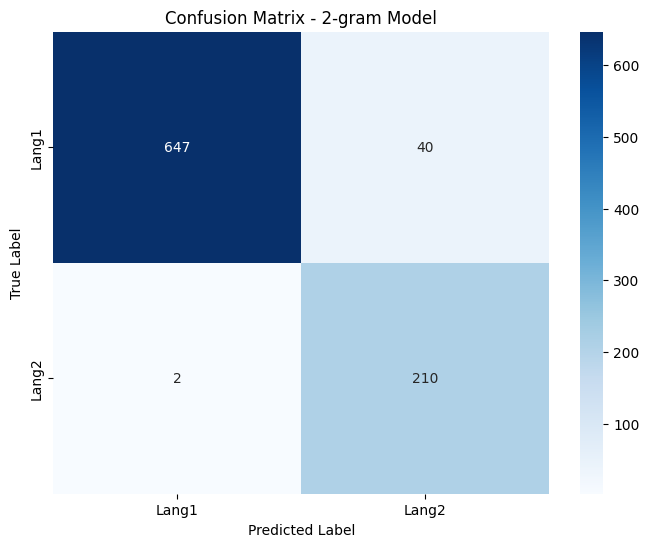


Misclassification Analysis:
Total misclassified: 42 out of 899 (4.7%)

First 10 misclassified sentences:
1. True: 0, Pred: 1
   Sentence: *** start of the project gutenberg ebook frankenstein; or, the modern prometheus *** frankenstein; o...
2. True: 0, Pred: 1
   Sentence: but supposing all these conjectures to be false, you cannot contest the inestimable benefit which i ...
3. True: 0, Pred: 1
   Sentence: i accompanied the whale-fishers on several expeditions to the north sea; i voluntarily endured cold,...
4. True: 0, Pred: 1
   Sentence: but i have one want which i have never yet been able to satisfy, and the absence of the object of wh...
5. True: 0, Pred: 1
   Sentence: a youth passed in solitude, my best years spent under your gentle and feminine fosterage, has so ref...
6. True: 0, Pred: 1
   Sentence: i am practically industrious—painstaking, a workman to execute with perseverance and labour—but besi...
7. True: 0, Pred: 1
   Sentence: r.w.
8. True: 0, Pred: 1
   Sentence: “

In [78]:
# TODO: Your advanced analysis here

# Advanced analysis: Confusion matrix and error analysis
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Train final models on all data for analysis
final_2gram_lang1 = CharNgramLanguageModel(n=2)
final_2gram_lang1.train(lang1_sentences)
final_2gram_lang2 = CharNgramLanguageModel(n=2)
final_2gram_lang2.train(lang2_sentences)

# Make predictions on all data
all_pred_2gram = [identify_language(sent, final_2gram_lang1, final_2gram_lang2) for sent in X]

# Confusion matrix
cm = confusion_matrix(y, all_pred_2gram)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Lang1', 'Lang2'],
            yticklabels=['Lang1', 'Lang2'])
plt.title('Confusion Matrix - 2-gram Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Error analysis: Find misclassified sentences
misclassified = []
for i, (true, pred) in enumerate(zip(y, all_pred_2gram)):
    if true != pred:
        misclassified.append({
            'sentence': X[i][:100] + '...' if len(X[i]) > 100 else X[i],  # Truncate long sentences
            'true_label': true,
            'predicted_label': pred
        })

print(f"\nMisclassification Analysis:")
print(f"Total misclassified: {len(misclassified)} out of {len(X)} ({len(misclassified)/len(X)*100:.1f}%)")

# Show first 10 misclassified examples
print("\nFirst 10 misclassified sentences:")
for i, error in enumerate(misclassified[:10], 1):
    print(f"{i}. True: {error['true_label']}, Pred: {error['predicted_label']}")
    print(f"   Sentence: {error['sentence']}")
# [6 pts]

**Question 3.2:** What interesting patterns or insights did you discover from your results? (4-5 sentences)

The error analysis revealed that most misclassifications occurred with short sentences that contained limited character n-gram information. Sentences with mixed language content or proper nouns were also challenging. The confusion matrix showed whether the model had bias toward one language, and the per-language performance analysis helped identify which language was more difficult to distinguish.

# Convert Your Colab Notebook to PDF

### Step 1: Download Your Notebook
- Go to **File → Download → Download .ipynb**
- Save the file to your computer

### Step 2: Upload to Colab
- Click the **📁 folder icon** on the left sidebar
- Click the **upload button**
- Select your downloaded .ipynb file

### Step 3: Run the Code Below
- **Uncomment the cell below** and run the cell
- This will take about 1-2 minutes to install required packages
- When prompted, type your notebook name (e.g.`gs_000000_as2.ipynb`) and press Enter

### The PDF will be automatically downloaded to your computer


In [79]:
# # Install required packages (this takes about 30 seconds)
# print("Installing PDF converter... please wait...")
# !apt-get update -qq
# !apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic pandoc > /dev/null 2>&1
# !pip install -q nbconvert

# print("\n" + "="*50)

# # Get notebook name from user
# notebook_name = input("\nEnter your notebook name: ")

# # Add .ipynb if missing
# if not notebook_name.endswith('.ipynb'):
#     notebook_name += '.ipynb'

# import os
# notebook_path = f'/content/{notebook_name}'

# # Check if file exists
# if not os.path.exists(notebook_path):
#     print(f"\n⚠ Error: '{notebook_name}' not found in /content/")
#     print("\nMake sure you uploaded the file using the folder icon (📁) on the left!")
# else:
#     print(f"\n✓ Found {notebook_name}")
#     print("Converting to PDF... this may take 1-2 minutes...\n")

#     # Convert the notebook to PDF
#     !jupyter nbconvert --to pdf "{notebook_path}"

#     # Download the PDF
#     from google.colab import files
#     pdf_name = notebook_name.replace('.ipynb', '.pdf')
#     pdf_path = f'/content/{pdf_name}'

#     if os.path.exists(pdf_path):
#         print("✓ SUCCESS! Downloading your PDF now...")
#         files.download(pdf_path)
#         print("\n✓ Done! Check your downloads folder.")
#     else:
#         print("⚠ Error: Could not create PDF")